# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Function to generate random sample data from a given distribution

In [7]:
def gen_data(n_sample=50,dist='uniform',random_var=0):
    """
    Generates data points for a desired distributions and return as numpy array
    """
    
    if dist=='uniform':
        d=np.random.random(size=n_sample)
    if dist=='normal':
        d=np.random.normal(loc=1-random_var,scale=1+random_var,size=n_sample)
    if dist=='binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,size=n_sample)
    if dist=='exponential':
        d=np.random.exponential(scale=0.5+random_var,size=n_sample)
    if dist=='poisson':
        d=np.random.poisson(lam=1.0+random_var,size=n_sample)
    if dist=='chisquare':
        d=np.random.chisquare(df=3+int(5*random_var),size=n_sample)
    if dist=='gamma':
        d=np.random.gamma(shape=1.0+random_var,scale=0.5+random_var,size=n_sample)
    if dist=='beta':
        d=np.random.beta(a=0.5+random_var,b=1.0+random_var,size=n_sample)
    if dist=='triangular':
        d=np.random.triangular(left=0.0,mode=np.min([0.5+random_var,1.0]),right=1.0,size=n_sample)
    if dist=='lognormal':
        d=np.random.lognormal(mean=1-random_var,sigma=1+random_var,size=n_sample)
    if dist=='laplace':
        d=np.random.laplace(scale=0.5+random_var,size=n_sample)
        
    # Normalize data
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d

# Kernel density plots and histograms to test the generative function

C:\Users\anijadon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\anijadon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\anijadon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\anijadon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


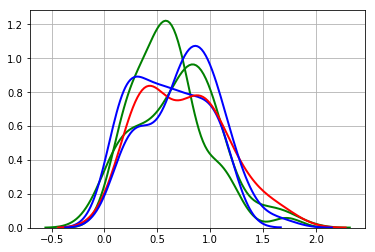

In [8]:
for r in [0.1,0.2,0.3,0.4,0.5]:
    test=gen_data(dist='beta',random_var=r)+gen_data(dist='exponential',random_var=r)
    sns.kdeplot(test,lw=2,c=np.random.choice(['k','orange','blue','green','red']))
    plt.grid(True)
plt.show()

In [9]:
dist_list=['uniform','normal','binomial','exponential','poisson','chisquare','gamma','beta','triangular','lognormal','laplace']

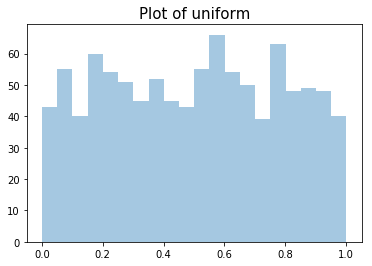

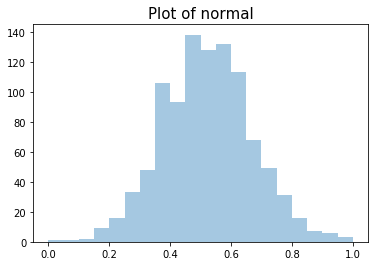

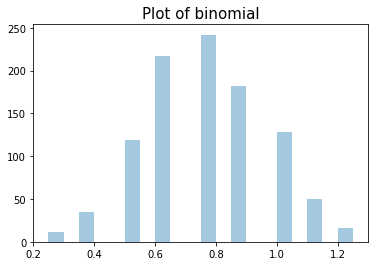

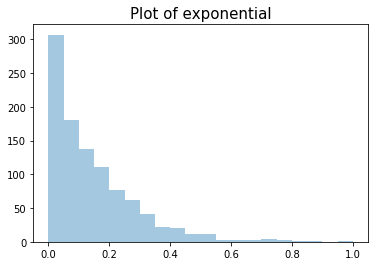

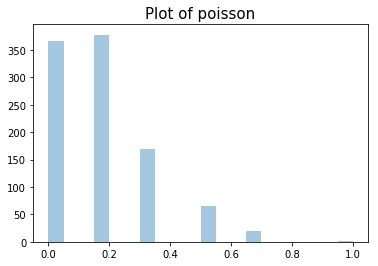

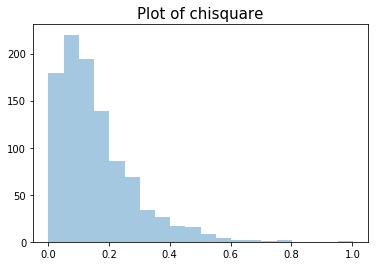

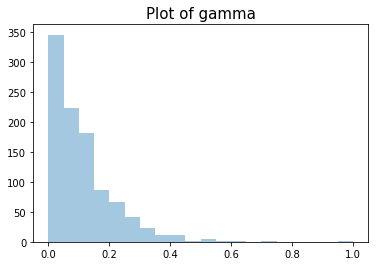

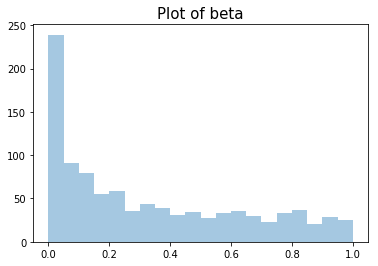

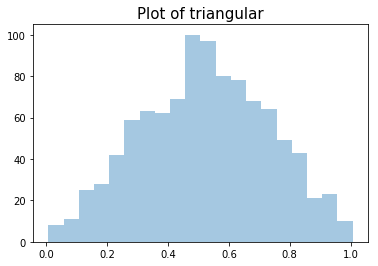

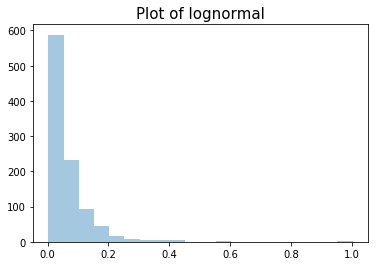

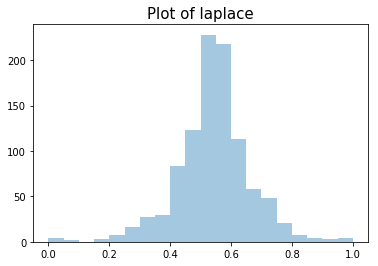

In [10]:
for d in dist_list:
    data = gen_data(n_sample=1000,dist=d)
    plt.title(f"Plot of {d}",fontsize=15)
    sns.distplot(data,kde=False,bins=20)
    plt.show()

# Function to generate data sets with various distributions and put them in a DataFrame

In [11]:
def gen_dist_df(n_input=5,n_sample=200,bins=10):
    """
    Generates randomized data sets calling gen_data with various distributions and put them in a DataFrame
    """
    import pandas as pd
    
    df_data={}
    df_data['Data']=[]
    df_data['Histogram']=[]
    df_data['Type']=[]
    dist_list=['uniform','normal','binomial','exponential','poisson','chisquare',\
               'gamma','beta','triangular','lognormal','laplace']
    for i in range(n_input):
        r=np.random.random()
        dist=np.random.choice(dist_list)
        d=gen_data(n_sample=n_sample,dist=dist,random_var=r)
        d=d.reshape(n_sample,)
        df_data['Data'].append(d)
        # Add histogram bin array after range scaling
        hist=np.histogram(d,bins=bins)[0]
        bins=len(hist)
        hist=(hist-hist.min())/(hist.max()-hist.min())
        # Reshape for proper input dimension to the NN
        hist=hist.reshape(bins,)
        df_data['Histogram'].append(hist)
        df_data['Type'].append(dist)
        
    df_data=pd.DataFrame(df_data)
        
    return df_data

# testing

In [12]:
n_input=1000
n_sample=500
n_bins=25
n_class=11

In [13]:
df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=n_bins)

In [15]:
df.head()
df['Data'][0].shape

(500,)